# Color Extraction from Clustering

In [2]:
import numpy as np
import cv2
import skimage.io as io
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
import sklearn
from sklearn.cluster import KMeans

(200, 200, 3)


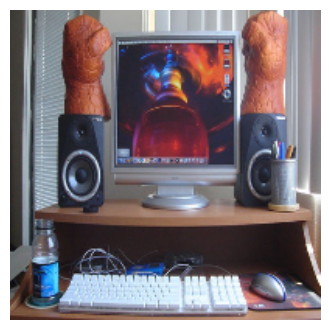

In [63]:
im = io.imread('/home/shubham/all_projects/CB/Summer_2018/data/2007_000559.jpg')
im = cv2.resize(im, (200, 200))

plt.figure(0)
plt.grid("off")
plt.xticks([])
plt.yticks([])
plt.imshow(im)
print im.shape
plt.show()

In [24]:
data = im.reshape((-1, 3))
print data.shape

(40000, 3)


In [56]:
km = KMeans(n_clusters=32)

km.fit(data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=32, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [57]:
dom_colors = km.cluster_centers_.astype(np.uint8)

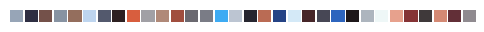

In [58]:
plt.figure(0)

for cx in range(dom_colors.shape[0]):
    plt.subplot(1, dom_colors.shape[0], cx + 1)
    plt.grid("off")
    plt.xticks([])
    plt.yticks([])
    col = np.zeros((50, 50, 3), dtype=np.uint8)
    col[:, :, :] = dom_colors[cx]
    plt.imshow(col)

In [64]:
new_img = np.zeros_like(data)
labels = km.predict(data)

print np.unique(labels, return_counts=True)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31],
      dtype=int32), array([1256, 1975, 1183, 1958, 1060,  841, 1106, 2738,  396, 1853, 1132,
        723, 1711, 1915,  191,  979, 2505,  570,  198,  987, 1270, 1325,
        190, 2434, 1740,  791,  444,  961, 1723,  688, 1327, 1830]))


In [60]:
for ix in range(new_img.shape[0]):
    new_img[ix, :] = dom_colors[labels[ix]]

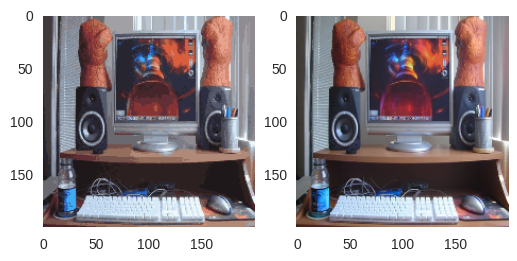

In [61]:
plt.subplot(1, 2, 1)
plt.grid("off")
plt.imshow(new_img.reshape(im.shape))

plt.subplot(1, 2, 2)
plt.grid("off")
plt.imshow(im)